In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import os

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import TextVectorization

from keras.optimizers import Adam

from sklearn.linear_model import LinearRegression

In [25]:
sequence = np.array(list(range(10))).astype(float)
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
window_size = 3

In [27]:
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [28]:
train_data.shape

(70, 3, 1)

In [29]:
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [31]:
model = Sequential([
    SimpleRNN(1,activation='linear')
])

model.compile(loss='mse', optimizer=Adam(learning_rate=1))

model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 2ms/step - loss: 145.8821
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 57.9178
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 29.8402
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 52.3642
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 1.8492
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 1.0062
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 2.0932
Epoch 8/100
3/3 [==============================] - 0s 1ms/step - loss: 0.4223
Epoch 9/100
3/3 [==============================] - 0s 1ms/step - loss: 1.1618
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6993
Epoch 11/100
3/3 [==============================] - 0s 1ms/step - loss: 0.5377
Epoch 12/100
3/3 [==============================] - 0s 998us/step - loss: 0.4329
Epoch 13/100
3/3 [==============================] - 0s

In [32]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [33]:
preds = model.predict(train_data).flatten()

3/3 [==============================] - 0s 2ms/step


In [34]:
for i in range(len(preds[:3])):
    example = train_data[i].flatten()
    pred = preds[i]
    print("example: ",example,"pred: ", pred)

example:  [0. 1. 2.] pred:  3.0000029
example:  [1. 2. 3.] pred:  4.000018
example:  [2. 3. 4.] pred:  5.0000324


In [35]:
out_of_sample_data = np.array([[6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12]]).reshape(5,3,1)

In [37]:
#make predictions using the model
preds = model.predict(out_of_sample_data).flatten()

1/1 [==============================] - 0s 131ms/step


In [38]:
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 9.000091552734375
[7 8 9] -> 10.000106811523438
[ 8  9 10] -> 11.000121116638184
[ 9 10 11] -> 12.000136375427246
[10 11 12] -> 13.000151634216309


## Harder case

In [39]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [40]:
sequence = np.sin(np.arange(0,6*3.14159,0.1))
sequence += np.random.normal(0,0.05,len(sequence))

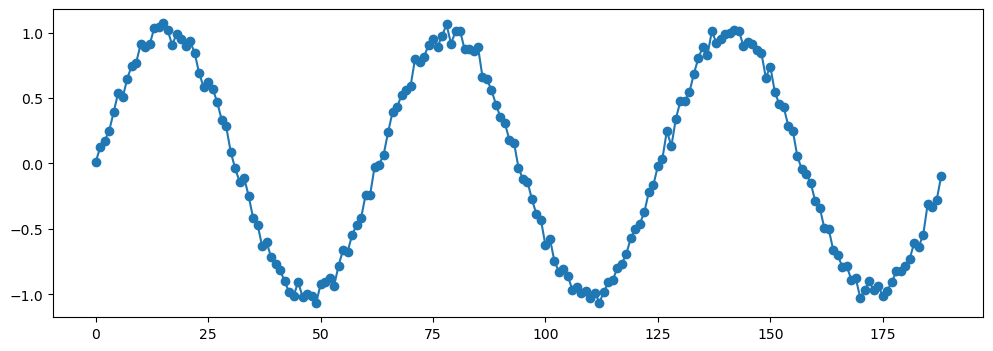

In [62]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)

In [63]:
#generate training data
train_data = [np.array(sequence[i:i+window_size]).reshape(1,-1) for i in range(sequence.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [64]:
#get training labels
train_label = [sequence[i+window_size] for i in range(sequence.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [65]:
#init model
model = Sequential()  

#RNN
model.add(SimpleRNN(2, activation='tanh'))

#Dense layer
model.add(Dense(1))

#compile model
opt = Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

#train model
model.fit(train_data, train_label, epochs=25, verbose=1)

Epoch 1/25
59/59 [==============================] - 1s 1ms/step - loss: 0.1268 - mse: 0.1268
Epoch 2/25
59/59 [==============================] - 0s 1ms/step - loss: 0.0118 - mse: 0.0118
Epoch 3/25
59/59 [==============================] - 0s 1ms/step - loss: 0.0100 - mse: 0.0100
Epoch 4/25
59/59 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0094
Epoch 5/25
59/59 [==============================] - 0s 1ms/step - loss: 0.0089 - mse: 0.0089
Epoch 6/25
59/59 [==============================] - 0s 1ms/step - loss: 0.0088 - mse: 0.0088
Epoch 7/25
59/59 [==============================] - 0s 975us/step - loss: 0.0090 - mse: 0.0090
Epoch 8/25
59/59 [==============================] - 0s 998us/step - loss: 0.0079 - mse: 0.0079
Epoch 9/25
59/59 [==============================] - 0s 1ms/step - loss: 0.0083 - mse: 0.0083
Epoch 10/25
59/59 [==============================] - 0s 992us/step - loss: 0.0082 - mse: 0.0082
Epoch 11/25
59/59 [==============================] - 0s 966us/s

In [59]:
model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
59/59 [==============================] - 1s 1ms/step - loss: 0.0348
Epoch 2/100
59/59 [==============================] - 0s 753us/step - loss: 0.0011
Epoch 3/100
59/59 [==============================] - 0s 788us/step - loss: 7.4419e-04
Epoch 4/100
59/59 [==============================] - 0s 792us/step - loss: 6.9628e-04
Epoch 5/100
59/59 [==============================] - 0s 811us/step - loss: 5.0017e-04
Epoch 6/100
59/59 [==============================] - 0s 811us/step - loss: 3.9760e-04
Epoch 7/100
59/59 [==============================] - 0s 804us/step - loss: 5.0165e-04
Epoch 8/100
59/59 [==============================] - 0s 829us/step - loss: 3.9320e-04
Epoch 9/100
59/59 [==============================] - 0s 826us/step - loss: 2.7711e-04
Epoch 10/100
59/59 [==============================] - 0s 891us/step - loss: 2.9781e-04
Epoch 11/100
59/59 [==============================] - 0s 834us/step - loss: 4.5021e-04
Epoch 12/100
59/59 [==============================] - 0s 813us

In [67]:
#make predictions using the linear model
preds = []
input_vec = train_data[-1:].copy()
for _ in range(15):
    pred = model.predict(input_vec).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

1/1 [==============================] - 0s 17ms/step


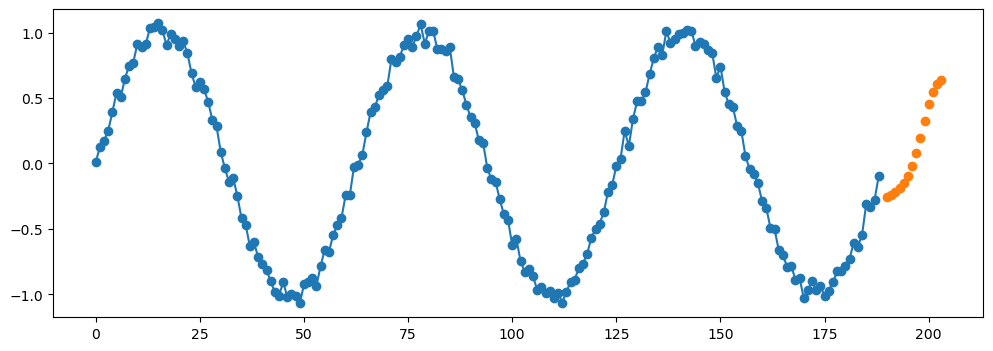

In [68]:
plt.figure(figsize=(12,4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence)+1, len(sequence)+15), preds[1:])

# Inspired by:
https://www.youtube.com/watch?v=FTCpdNuIiZM&t=4s